## Dead reckoning

The following pages contain a simple implementation of dead reckoning with the 
Explicit and Implicit Euler Method for a bi-cycle given the steering angle and 
velocity at every timestep t.

In [53]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Explicit Euler Method

$$ X_{k+1} = X_{k} + T \cdot X_{k}' $$ where T is the discretization step size.

The derivative can be approximated by a circular path around the instant center of rotation "ICR").
$$ X_{k}' = ( v \cdot cos(\theta_k) , v \cdot sin(\theta_k) , v \cdot \frac{tan(\alpha_t)}{l})^T $$

In [91]:
def explicit_euler(length, t_end, T, X_start, v_func, alpha_func):
    # explicit euler
    explicits = [X_start]
    
    t_steps = int(math.ceil((t_end - 0.0) / T))
    
    for i in range(t_steps):
        # velocity and steer at time i
        v_k = v_func(i)
        alpha_k = alpha_func(i) if alpha_func(i) != 0 else 0.00001
        R = length / math.tan(alpha_k)

        # old X and derivative of old X
        x_k, y_k, theta_k = explicits[-1]
        x_dot = v_k * np.array([math.cos(theta_k), math.sin(theta_k), 1/R])

        # store values and norm angles only between 0 and 2 pi
        explicits += [ explicits[-1] + T * x_dot] 
        explicits[-1][2] %= 2*math.pi

    np_explicits = np.array(explicits)
    
    return np_explicits


### Implicit Euler Method

$$ X_{k+1} = X_{k} + T \cdot X_{k+1}' $$ yields system of linear equations. 

1. $ x_{k+1} = x_{k} + T \cdot v \cdot cos(\theta_{k+1}) $
2. $ y_{k+1} = y_{k} + T \cdot v \cdot sin(\theta_{k+1}) $
3. $ \theta_{k+1} = \theta_{k} + T \cdot v \cdot 2 \cdot tan(\alpha_{k+1}) $

The third equation yields $ \theta_{k+1} $ which can be inserted into the first and second.

In [92]:
def implicit_euler(length, t_end, T, X_start, v_func, alpha_func):
    implicits = [X_start]
    t_steps = int(math.ceil((t_end - 0.0) / T))
    
    for i in range(t_steps):
        # old state
        x_k, y_k, theta_k = implicits[-1]
        
        # next control variables
        alpha_k_plus_1 = alpha_func(i+1)
        v_k_plus_1 = v_func(i+1)
        
        # X_k+1
        theta_k_plus_1 = theta_k + T * v_k_plus_1 * 2 * math.tan(alpha_k_plus_1)
        x_k_plus_1 = x_k + T * v_k_plus_1 * math.cos(theta_k_plus_1)
        y_k_plus_1 = y_k + T * v_k_plus_1 * math.sin(theta_k_plus_1)

        # store values and norm angles only between 0 and 2 pi
        implicits += [ np.array([x_k_plus_1, y_k_plus_1, theta_k_plus_1]) ] 
        implicits[-1][2] %= 2*math.pi

    np_implicits = np.array(implicits)
    
    return np_implicits

In [93]:
def visualize_state_sequence(Xs):
    plt.plot(range(Xs.shape[0]), Xs)
    plt.show()
    plt.scatter(Xs[:, [0]], Xs[:, [1]]) 
    plt.show()

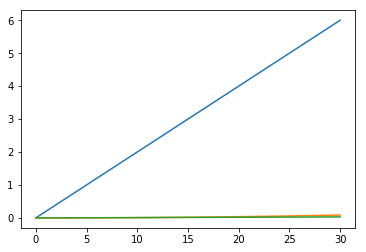

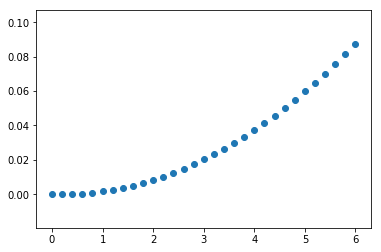

In [94]:
# command variables
def v(t):
    return 2

def alpha(t):
    if t == 0:
        return 0.001
    if 1 < t < 2:
        return 0.3 * math.pi / 180.0
    
    return 0.15 * math.pi / 180.0

x1 = explicit_euler(length=0.5, t_end=3.0, T=0.1, X_start=np.zeros(3), v_func=v, alpha_func=alpha)

visualize_state_sequence(x1)

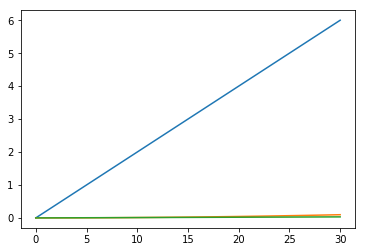

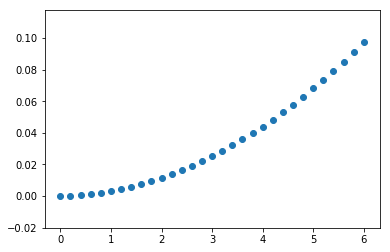

In [95]:
x2 = implicit_euler(length=0.5, t_end=3.0, T=0.1, X_start=np.zeros(3), v_func=v, alpha_func=alpha)

visualize_state_sequence(x2)

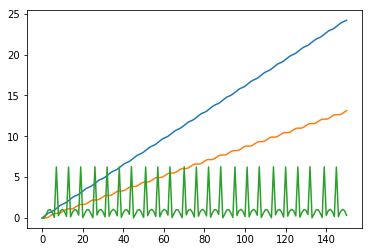

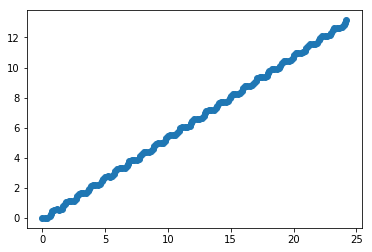

In [98]:
x3 = explicit_euler(length=0.5, t_end=15.0, T=0.1, X_start=np.zeros(3), v_func=v, alpha_func=math.sin)

visualize_state_sequence(x3)

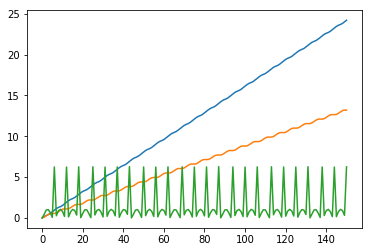

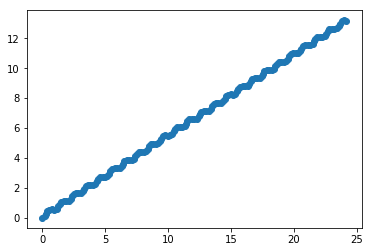

In [99]:
x4 = implicit_euler(length=0.5, t_end=15.0, T=0.1, X_start=np.zeros(3), v_func=v, alpha_func=math.sin)

visualize_state_sequence(x4)